In [12]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
data_set = pd.read_csv("./sa.csv")
data_set.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
X = data_set.iloc[:,:-1].values
y = data_set.iloc[:,-1].values

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

Encoding the Dependent variable with StandardScalar

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training model with SVM - Kernel - RBF (Radial Basis Function Kernel) 

In [48]:
from sklearn.svm import SVC
clas = SVC(kernel = 'rbf',random_state = 0)
clas.fit(X_train,y_train)

SVC(random_state=0)

[1]


In [50]:
Y_pred = clas.predict(X_test)

Testing the accuracy and error rate

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,Y_pred)
print(cm)
accuracy_score(y_test,Y_pred)

[[64  4]
 [ 3 29]]


0.93

Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


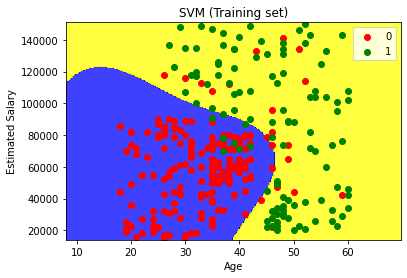

In [53]:

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = nm.meshgrid(nm.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     nm.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clas.predict(sc.transform(nm.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(nm.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()